Miguel Colom  
Rafael Grompone von Gioi  
Argyris Kalogeratos

TP1 : Optimisation Numérique  
Première Année Master Hadamard

# <center>Méthode de descentes de gradient et algorithmes de Newton</center>

##  À savoir avant de commencer :
  *  Justifiez de manière appropriée les solutions proposées dans le notebook en tant que réponses. Évitez d'ajouter un code qui n'est pas expliqué. Le notebook livré est la combinaison de code et de réponses bien élaborées.

  *  Prenez-garde à ce que votre code compile correctement et ne dépende pas d'autres modules que ceux indiqués dans le TP.

  *  Lorsque vous comparez plusieurs graphiques, veuillez utiliser la même figure. Ne créez pas de nouvelle figure pour chaque graphique.
  
  * Ajoutez chaque réponse juste en dessous de chaque question. Là, vous pouvez creer plusieur "cells" de code, de résultats/figures, ou de comentaires.

  *  $\rightarrow$ **Seuls les devoirs rendus sur eCampus sont acceptés!** Ils ne doivent jamais être envoyés par mail aux responsables des TP.
Veuillez vous assurer que votre accès à eCampus fonctionne correctement. Si ce n'est pas le cas, veuillez contacter immédiatement les responsables pédagogiques ou informatiques.

Remarque : la plupart du temps on n'implémente pas les méthodes classiques présentées dans ce TP et on utilise des paquets du type ``scipy``. Néanmoins, il convient de savoir ce que contienne ces _boîtes noires_ et de se forger une intuition sur les différentes méthodes d'optimisation.

In [ ]:
# Import basic packages
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

# Exercise 1. Méthode de gradient à pas fixe (10pt)
Le but de cet exercice est d'implémenter la descente de gradient à pas fixe et d'identifier ses
atouts et limites.

**Banane de Rosenbrock**
Dans notre première exemple, on étudie la fonction $f: \mathbb{R}^2 \ \rightarrow \ \mathbb{R}$ suivante
$$f(x_1,x_2) = (x_1-1)^2 + 100\, (x_1^2-x_2)^2.$$
$f$ est de classe $\mathcal{C}^1(\mathbb{R}^2, \mathbb{R})$, positive, atteint son unique minimum en $x^* = (1,1)$ et $f(x^*) = 0$.
Voici le code python qui calcule cette fonction et son gradient.

In [ ]:
## Rosenbrock function and its gradient

def rosenbrock(x):
    y = np.asarray(x)
    return (y[0] - 1)**2 + 100 * (y[1] - y[0]**2)**2


def rosenbrock_grad(x):
    y = np.asarray(x)
    grad = np.zeros_like(y)
    grad[0] = 400 * y[0] * (y[0]**2 - y[1]) + 2 * (y[0] - 1)
    grad[1] = 200 * (y[1] - y[0]**2)
    return grad

1) Tracer les lignes de niveau de $f$ dans le rectangle $(x_1,x_2)\in [-1.5,\,1.5]\times[-0.5,\, 1.5]$.
On utilisera la fonction ``plt.contour``.


[[762.5        760.8464504  759.1957992  ... 751.56004281 753.2037992
  754.8504504 ]
 [761.9501     760.2971502  758.6470984  ... 751.01194101 752.6550984
  754.3011502 ]
 [761.4004     759.74805    758.0985976  ... 750.46403921 752.1065976
  753.75205   ]
 ...
 [ 62.9509      62.495151    62.0415016  ...  55.60194821  56.0495016
   56.499151  ]
 [ 62.8004      62.3452508   61.8922008  ...  55.45324641  55.9002008
   56.3492508 ]
 [ 62.6501      62.1955506   61.7431     ...  55.30474461  55.7511
   56.1995506 ]]


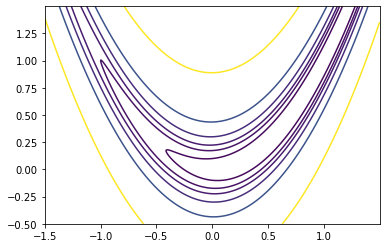

In [ ]:
plt.figure()
plt.clf()
delta=0.001
x = np.arange(-1.5, 1.5, delta)
y = np.arange(-0.5, 1.5, delta)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X,Y])
print(Z)
plt.contour(X,Y,Z,levels=[0,2,4,6,10,20,80])

2) Implémenter la méthode de gradient à pas fixe qui définit la suite $(x_k)_{k \in \mathtt{N}}$ par récurrence :
$$x_{k+1} = x_{k} - h \, \nabla f(x_{k}).$$ 
Proposer au moins deux critères d'arrêt pour l'algorithme et  discuter de leur pertinence.

In [ ]:
x0=[0,0]
h=0.001
x=x0
grad=rosenbrock_grad(x)
n=0
while max(abs(a) for a in grad)>0.01:
  x=x-h*grad
  grad=rosenbrock_grad(x)
  n+=1

print("methode 1")
print("x*=",x)
print("gradient=",grad)
print("nombre d'iterations=",n)

#methode 2

x=x0
grad=rosenbrock_grad(x)
n=0
while max(np.absolute(h*grad))>0.000001:
  x=x-h*grad
  grad=rosenbrock_grad(x)
  n+=1
print("methode 2")
print("x*=",x)
print("gradient=",grad)
print("nombre d'iterations=",n)


methode 1
x*= [0.98760229 0.9753083 ]
gradient= [-0.00505053 -0.00999638]
nombre d'iterations= 8037
methode 2
x*= [0.99875174 0.99750004]
gradient= [-0.0004995  -0.00099976]
nombre d'iterations= 13740


La première critère d'arrêt est $||\nabla f(x_k)||_\infty< \delta$

La seconde est $||x_{k+1}-x_k|| < \epsilon$

Pour une fonctionnelle strictement convexe, on peut choisir n'importe quelle critère, mais leur efficacité dépende de l'ordre de grandeur de ces valeurs.

3) Tracer graphiquement les itérées de la méthode de gradient à pas fixe avec comme point initial $x_{0}=(-1,1)$ et différentes valeurs de $h$. Interpréter les résultats.


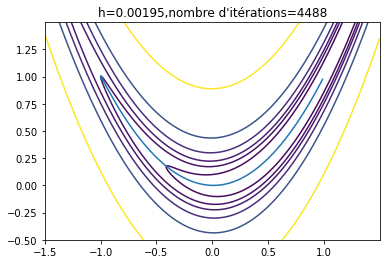

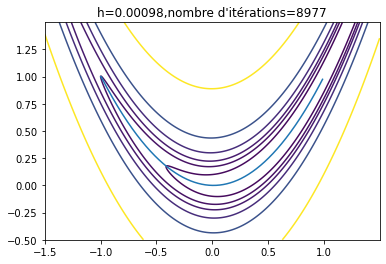

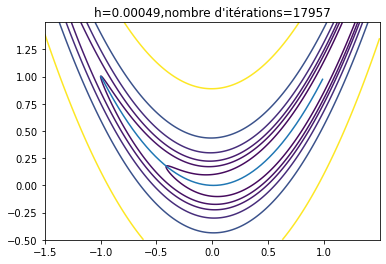

In [ ]:
delta=0.001
x = np.arange(-1.5, 1.5, delta)
y = np.arange(-0.5, 1.5, delta)
Xo, Yo = np.meshgrid(x, y)
Zo = rosenbrock([Xo,Yo])


for i in range(9,12):
  plt.figure()
  plt.contour(Xo,Yo,Zo,levels=[0,2,4,6,10,20,80])
  h=2**-i
    
  x0=np.array([-1,1])
  x=x0
  grad=rosenbrock_grad(x)
  n=0
  X=np.array([x])
  while max(abs(a) for a in grad)>0.01:
    x=x-h*grad
    grad=rosenbrock_grad(x)
    n+=1
    X=np.concatenate((X,np.array([x])))
  plt.plot(X[:,0],X[:,1])
  plt.title("h={:7.5f},nombre d'itérations={}".format(h,n))

Pour la même critère, le nombre d'itérations nécessité est proportionnelle à 1/h.

4) Recommencer avec le gradient normalisé
$$
x_{k+1} = 
\begin{cases}
x_{k} - h \, \nabla f(x_{k}) / \Vert \nabla f(x_{k}) \Vert & \text{ if  $ \nabla f(x_{k}) \not = 0$ } \\
x_k & \text{ sinon}.
\end{cases}
$$
avec $h = 5 \times 10^{-2}$ et en affichant les 200 premières itérations. 
Interpréter. Cette méthode a-t-elle une chance de converger ? 

[[-1.00000000e+00  1.00000000e+00]
 [-9.50000000e-01  1.00000000e+00]
 [-9.93096711e-01  9.74648994e-01]
 [-9.44823620e-01  9.87676221e-01]
 [-9.87820913e-01  9.62156959e-01]
 [-9.39815279e-01  9.76137626e-01]
 [-9.82717924e-01  9.50459562e-01]
 [-9.34911960e-01  9.65108445e-01]
 [-9.77722485e-01  9.39277090e-01]
 [-9.30077034e-01  9.54439905e-01]
 [-9.72796767e-01  9.28458673e-01]
 [-9.25286404e-01  9.44039603e-01]
 [-9.67915926e-01  9.17910618e-01]
 [-9.20522910e-01  9.33844922e-01]
 [-9.63062284e-01  9.07569426e-01]
 [-9.15773614e-01  9.23810784e-01]
 [-9.58222518e-01  8.97389381e-01]
 [-9.11028322e-01  9.13903249e-01]
 [-9.53386134e-01  8.87336055e-01]
 [-9.06278714e-01  9.04095858e-01]
 [-9.48544559e-01  8.77382597e-01]
 [-9.01517791e-01  8.94367386e-01]
 [-9.43690582e-01  8.67507460e-01]
 [-8.96739515e-01  8.84700402e-01]
 [-9.38817975e-01  8.57692937e-01]
 [-8.91938560e-01  8.75080300e-01]
 [-9.33921238e-01  8.47924182e-01]
 [-8.87110133e-01  8.65494624e-01]
 [-9.28995415e-01  8

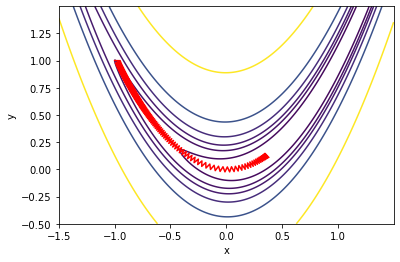

In [ ]:
delta=0.001
x = np.arange(-1.5, 1.5, delta)
y = np.arange(-0.5, 1.5, delta)
Xo, Yo = np.meshgrid(x, y)
Zo = rosenbrock([Xo,Yo])



plt.figure()
plt.contour(Xo,Yo,Zo,levels=[0,2,4,6,10,20,80])
h=5*10**-2
x0=np.array([-1,1])
x=x0
grad=rosenbrock_grad(x)
n=0
X=np.array([x])
while (grad !=np.array([0,0])).all and n<200:
  x= x - h* grad/np.linalg.norm(grad,2)
  grad=rosenbrock_grad(x)
  n+=1

  X=np.concatenate((X,np.array([x])))
print(X)
plt.plot(X[:,0],X[:,1],'r')
plt.xlabel("x")
plt.ylabel("y")


print("h=",h)
print("x*=",x)
print("gradient=",grad)
print("nombre d'iterations=",n)

Cette méthode ne va pas converger.

**Problème quadratique**
On introduit la fonction $f$ définie sur $\mathbb{R}^n$ ($n \in \mathbb{N}$ avec $n \geq 2$) par $f(x) = x^T A x$ avec $A$ diagonale telle que $A_{1,1} = m^2$, $A_{2,2} = M^2$ avec $(M,m) \in {\mathbb{R}_+^*}^2$ et tous les autres coefficients diagonaux fixés à $1$. $f$ est une fonction strictement convexe coercive qui possède donc un unique minimum (en $0$). Voici le code python qui calcule cette fonction et son gradient.

In [ ]:
def mk_quad(m, M, ndim=2):
  ## Quadratic function and its gradient
    def quad(x):
        y = np.copy(np.asarray(x))
        scal = np.ones(y.shape)
        scal[0] = m
        scal[1] = M
        y = y* scal
        return np.sum(y**2, 0)

    def quad_grad(x):
        y = np.asarray(x)
        scal = np.ones(y.shape)
        scal[0] = m ** 2
        scal[1] = M ** 2
        return 2 * scal * y

    return quad, quad_grad

1) Représenter les lignes de niveaux de la fonction $f$ pour différentes valeurs de $M$ et de $m$ pour $n=2$. À votre avis, quand est-ce que le problème d'optimisation est le plus facile à résoudre ?

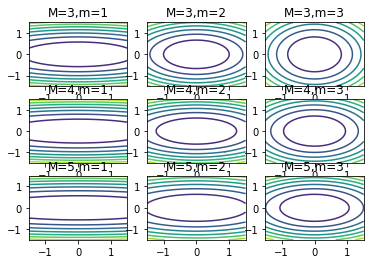

In [ ]:
delta=0.001
x = np.arange(-1.5, 1.5, delta)
y = np.arange(-1.5, 1.5, delta)
Xo, Yo = np.meshgrid(x, y)



for i in range(1,4):
  M=i+2
  for j in range(1,4):
    m=j
    plt.subplot(3,3,(i-1)*3+j)
    quad,quad_grad=mk_quad(m,M)
    Zo=quad([Xo,Yo])
    plt.contour(Xo,Yo,Zo)
    plt.title("M={},m={}".format(M,m))

Il sera le plus facile à résoudre quand M = m.

2) Utiliser l'algorithme du gradient à pas fixe pour minimiser $f$ pour différentes valeurs de $m$, $M$ et points initiaux $x_0$ pour la valeur du pas $h$ optimal théoriquement. Illustrer par des graphiques la minimisation de $f$ et commenter les.

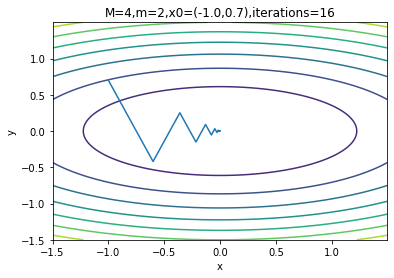

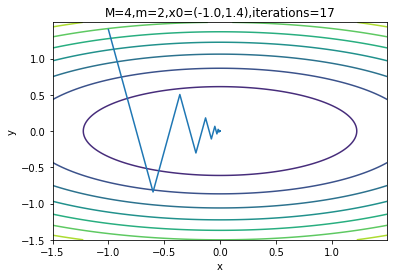

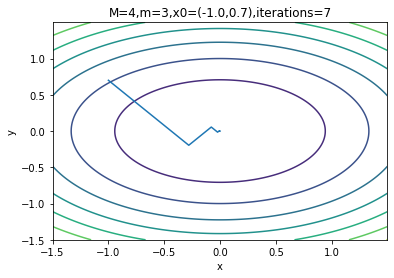

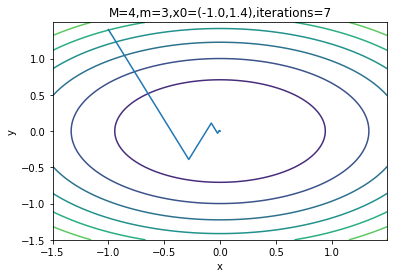

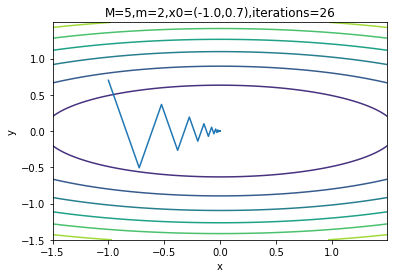

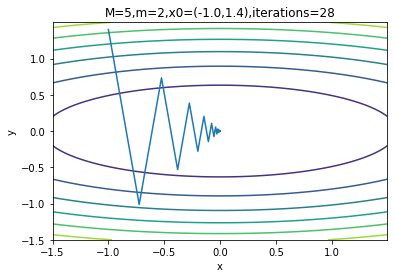

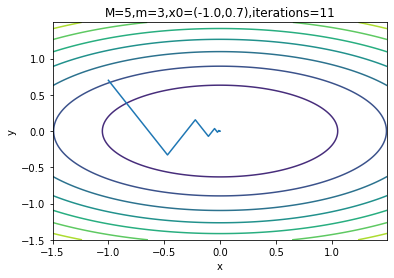

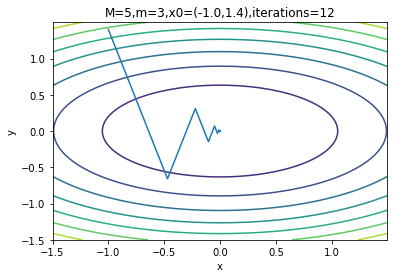

In [ ]:
for i in range(2,4):
  M=i+2
  for j in range(2,4):
    m=j
    for k in range(1,3):
      x0=np.array([-1,k*0.7])

      h=1/(m**2+M**2)
      delta=0.001
      x = np.arange(-1.5, 1.5, delta)
      y = np.arange(-1.5, 1.5, delta)
      Xo, Yo = np.meshgrid(x, y)
      plt.figure()
      plt.clf()
      quad,quad_grad=mk_quad(m,M)
      Zo=quad([Xo,Yo])
      plt.contour(Xo,Yo,Zo)
      

      
      x=x0
      grad=quad_grad(x)
      n=0
      X=np.array([x])
      while max(abs(a) for a in grad)>0.01:
        x=x-h*grad
        grad=quad_grad(x)
        n+=1
        X=np.concatenate((X,np.array([x])))
      plt.plot(X[:,0],X[:,1])
      plt.title("M={},m={},x0=({},{}),iterations={}".format(M,m,x0[0],x0[1],n))
      plt.xlabel("x")
      plt.ylabel("y")


Plus m et M s'éloignent, plus de nombre d'itérations l'algorithme nécessite pour approcher le minimum.

3) Estimer numériquement l'ordre de convergence de l'algorithme en fonction du pas $h$ et du nombre d'itération. 

Text(0, 0.5, '$-log(||x-x^*||)$ après itérations')

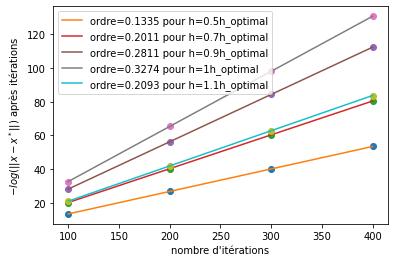

In [ ]:

m=3
M=5

x0=np.array([-1,1])
quad,quad_grad=mk_quad(m,M)
ho=1/(m**2+M**2) #h optimal
H=[0.5, 0.7, 0.9, 1, 1.1]
plt.figure()
plt.clf()

for p in H:
  h=p*ho
  Y=[]
  for i in range(1,5):
    iter=100*i
    x=x0
    grad=quad_grad(x)
    n=0
    while n<iter:
      x=x-h*grad
      grad=quad_grad(x)
      n+=1
    Y.append(np.linalg.norm(x,2))
  Y=np.array(Y)


  X=np.array([100*i for i in range(1,5)])
  plt.plot(X,-np.log10(Y),'o')
  P=np.polyfit(X,-np.log10(Y),1)
  plt.plot(X,X*P[0]+P[1],label='ordre={:.4f} pour h={}h_optimal'.format(P[0],p))
plt.legend(loc='best')
plt.xlabel("nombre d'itérations")
plt.ylabel("$-log(||x-x^*||)$ après itérations")



4) Vérifier expérimentalement que l'ordre de convergence l'algorithme ne dépend pas de la taille de la matrice $A$.

[2.88080390e-10 5.86830119e-20 1.19539407e-29 2.43506072e-39]
[3.52824981e-10 7.18717179e-20 1.46405275e-29 2.98232812e-39]
[4.07407195e-10 8.29903114e-20 1.69054250e-29 3.44369589e-39]
[4.55495092e-10 9.27859889e-20 1.89008397e-29 3.85016905e-39]


Text(0, 0.5, '$-log(||x-x^*||)$ après itérations')

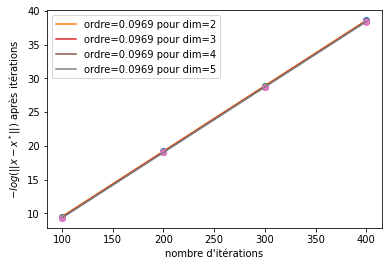

In [ ]:
m=1
M=3

quad,quad_grad=mk_quad(m,M)
ho=1/(m**2+M**2) #h optimal
plt.figure()
plt.clf()
for dim in range(2,6):
  Y=[]
  x0=np.ones(dim)
  quad,quad_grad=mk_quad(m,M,dim)
  for i in range(1,5):
    iter=100*i
    x=x0
    grad=quad_grad(x)
    n=0
    while n<iter:
      x=x-ho*grad
      grad=quad_grad(x)
      n+=1
    Y.append(np.linalg.norm(x,2))
  Y=np.array(Y)
  print(Y)


  X=np.array([100*i for i in range(1,5)])
  plt.plot(X,-np.log10(Y),'o')
  P=np.polyfit(X,-np.log10(Y),1)
  plt.plot(X,X*P[0]+P[1],label='ordre={:.4f} pour dim={}'.format(P[0],dim))
plt.legend(loc='best')
plt.xlabel("nombre d'itérations")
plt.ylabel("$-log(||x-x^*||)$ après itérations")


# Exercise 2. Choix du pas de descente : règle d'Armijo et règle de Wolfe (5pt)
A l'itération $k \in \mathbb{N}^*$ et pour et pour une direction de descente $d_{k}$ donnée, i.e $\langle d_{k},\nabla f(x_{k})\rangle<0$, la _recherche linéaire exacte_ consiste à estimer un pas de descente optimal $h^*$ qui vérifie $$h^* = \text{argmin}_{h \geq 0} f(x_{k} + h d_{k}),$$
introduisant donc un nouveau problème d'optimisation qui peut être aussi difficile que le problème de minimisation original. On introduit ici deux règles de *recherche linéaire inexacte*, la règle d'Armijo (1966) et la règle de Wolfe (1969).

**Règle d'Armijo.** La règle d'Armijo consiste, étant donné un point courant $x_k$ et une direction de descente $d_k$ à l'itération $k \in \mathbb{N}^*$, à trouver un pas $h_k >0$ satisfaisant
$$f(x_{k} + h_k d_{k}) \leq f(x_{k}) 
+ c\, h_k\, \langle \nabla f(x_{k}),d_{k} \rangle
$$
où $c \in ]0,1/2[$ est un paramètre fixé par l'utilisateur. 

Proposer une méthode permettant de trouver un tel pas $h_k$ et l'implémenter. Pour cela, on pourra considérer une suite décroissante tendant vers $0$ et initialisée à la valeur $\frac{-\langle \nabla f(x_{k}),d_{k} \rangle}{L \|d_{k}\|^2}$, où $L$ est un paramètre fixé par l'utilisateur. 


Input: $f$, $\nabla f$, $L$, $(d_k)_{n \in \mathbb{N}}$, $c$, $x_k$

$h=\frac{-\langle \nabla f(x_{k}),d_{k} \rangle}{L \|d_{k}\|^2}$

while $f(x_{k} + h d_k)> f(x_{k}) 
+ c h \langle \nabla f(x_{k}),d_{k} \rangle$:

$\quad$ h = h/2

$h_k=h$
output $h_k$


**Règle de Wolfe.** La règle de Wolfe consiste, étant donné un point courant $x_k$, une direction de descente $d_k$ à l'itération $k \in \mathbb{N}^*$, à trouver un pas $h_k >0$ satisfaisant
$$
f(x_{k} + h_k d_{k}) \leq f(x_{k}) 
+ c_1\, h_k\, \langle \nabla f(x_{k}),d_{k} \rangle, 
$$
et 
$$
  \langle d_k, \nabla f(x_k+h_k d_k) \rangle \geq  c_2    \langle d_k, \nabla f(x_k) \rangle
$$
où $c_1 \in ]0,1/2[$, $c_2 \in ]1/2,1[$ sont des paramètres fixés par l'utiisateur. 

Proposer une méthode permettant de trouver un tel pas $h_k$ et l'implémenter. Pour cela, on pourra par exemple
rechercher ce pas dans un intervalle
$[a,b]$ que l'on affinera au fur et à mesure et en prenant comme valeur initial $\frac{- \langle \nabla f(x_{k}),d_{k} \rangle}{L \|d_{k}\|^2}$, où
$L$ est un paramètre fixé par l'utilisateur. On pourra aussi se fixer un nombre maximal d'itérations.


Input: $f$, $\nabla f$, $L$, $c_1$, $c_2$, $a$, $x_k$,$d_k$

$h=\frac{- \langle \nabla f(x_{k}),d_{k} \rangle}{L \|d_{k}\|^2}$, $h_g=0$, $h_d=0$

while $f(x_{k} + h d_{k}) > f(x_{k}) 
+ c_1\, h\, \langle \nabla f(x_{k}),d_{k} \rangle,$ ou $
  \langle d_k, \nabla f(x_k+h d_k) \rangle <  c_2  \langle d_k, \nabla f(x_k) \rangle$ do

$\quad$ if $f(x_{k} + h d_{k}) > f(x_{k}) 
+ c_1\, h\, \langle \nabla f(x_{k}),d_{k} \rangle$ then

$\quad\quad h_d=h$

$\quad$ elif $\langle d_k, \nabla f(x_k+h d_k) \rangle <  c_2  \langle d_k, \nabla f(x_k) \rangle$ then

$\quad\quad h_g=h$

$\quad$ end if

$\quad$ if $h_d=0$ then

$\quad\quad h= ah$

$\quad$ else

$\quad\quad h= (h_g + h_d)/2$

$\quad$ end if

end while

output h


### Banane de Rosenbrock et problème quadratique
On considère les deux problèmes d'optimisation introduits dans l'exercice précédent.

1) Implémenter la méthode de gradient avec la règle d'Armijo et la règle de Wolfe.

In [ ]:
# Armijo
def gpo_armijo(f,gradf,x0,c,L,eps=0.01,iter=np.inf):
  x=x0
  grad=gradf(x)
  n=0
  X=np.array([x])
  while max(abs(a) for a in grad) > eps and n<iter:
    h=1/L
    d=-grad
    while f(x+h*d)>f(x)-c*h*np.dot(d,d):
      h=h/2 
    x=x-h*grad
    grad=gradf(x)
    n+=1
    X=np.concatenate((X,np.array([x])))
  return X,n

#Wolfe
def gpo_wolfe(f,gradf,x0,c1,c2,L,a,eps=0.01,iter=np.inf):
  x=x0
  grad=gradf(x)
  n=0
  X=np.array([x])
  hd=0
  hg=0
  while max(abs(a) for a in grad)>eps and n<iter:
    h=1/L
    d=-grad
    while f(x+h*d)>f(x)-c1*h*np.dot(d,d) or np.dot(d,gradf(x+h*d))<c2*np.dot(d,grad):
      if f(x+h*d)>f(x)-c1*h*np.dot(d,d):
        hd=h
      else:
        hg=h
      if hd==0:
        h=a*h
      else:
        h=(hg+hd)/2
    x=x-h*grad
    grad=gradf(x)
    n+=1
    X=np.concatenate((X,np.array([x])))
  return X,n

#GP fixe
def gpo_fixe(f,gradf,x0,h,eps=0.01,iter=np.inf):
  x=x0
  grad=gradf(x)
  n=0
  X=np.array([x])
  while max(abs(a) for a in grad)>eps and n<iter:
    x=x-h*grad
    grad=gradf(x)
    n+=1
    X=np.concatenate((X,np.array([x])))
  return X,n

2) Tester ces règles pour la fonction de Rosenbrock avec les valeurs suivantes pour $x_{0} = (-1,1)$, $L=100$ et différentes valeurs des paramètres $c,c_1,c_2$. Comparer les entre elles et avec la méthode de descente de gradient à pas fixe. On pourra par exemple afficher l'évolution au cours des algorithmes de la distance entre les itérés et le minimiseur de $f$ ainsi que la suite $(f(x_k)-f(x^{\star}))_{k \in \mathbb{N}}.$

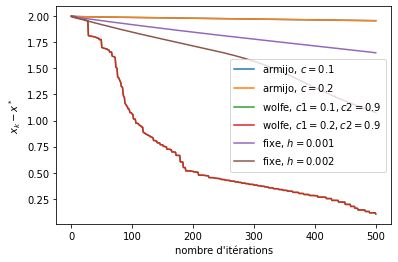

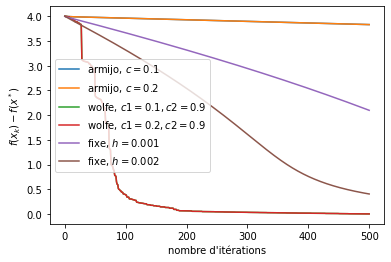

In [ ]:
x0=[-1,1]
L=10000
iteration=500

for i in range(1,3):
  c=0.1*i
  X,n=gpo_armijo(rosenbrock,rosenbrock_grad,x0,c,L,iter=iteration)
  Y=X-np.array([1,1]) #la distance entre les itérés et le minimiseur de f
  dist=[]
  for v in Y:
    dist.append(np.linalg.norm(v,2))
  dist=np.array(dist)
  y=rosenbrock(np.array([1,1]))

  Z=np.array([rosenbrock(x)-y for x in X]) #la suite f(x_k)-f(x^*)
  plt.figure(1)
  plt.plot(dist,label="armijo, $c={}$".format(c))
  plt.figure(2)
  plt.plot(Z,label="armijo, $c={}$".format(c))

a=1.5
for i in range(1,3):
  c1=0.1*i
  c2=1-0.1
  X,n=gpo_wolfe(rosenbrock,rosenbrock_grad,x0,c1,c2,L,a,iter=iteration)
  Y=X-np.array([1,1])
  dist=[]
  for v in Y:
    dist.append(np.linalg.norm(v,2))
  dist=np.array(dist)
  y=rosenbrock(np.array([1,1]))

  Z=np.array([rosenbrock(x)-y for x in X])
  plt.figure(1)
  plt.plot(dist,label="wolfe, $c1={},c2={}$".format(c1,c2))
  plt.figure(2)
  plt.plot(Z,label="wolfe, $c1={},c2={}$".format(c1,c2))

for i in range(1,3):
  h=0.001*i
  X,n=gpo_fixe(rosenbrock,rosenbrock_grad,x0,h,iter=iteration)
  Y=X-np.array([1,1])
  dist=[]
  for v in Y:
    dist.append(np.linalg.norm(v,2))
  dist=np.array(dist)
  y=rosenbrock(np.array([1,1]))

  Z=np.array([rosenbrock(x)-y for x in X])
  plt.figure(1)
  plt.plot(dist,label="fixe, $h={}$".format(h))
  plt.figure(2)
  plt.plot(Z,label="fixe, $h={}$".format(h))



plt.figure(1)
plt.xlabel("nombre d'itérations")
plt.ylabel("$x_k-x^*$")
plt.legend(loc="best")
plt.figure(2)
plt.xlabel("nombre d'itérations")
plt.ylabel("$f(x_k)-f(x^*)$")
plt.legend(loc="best")

Explications: nous insistons de tester avec L=10000 car c'est dans ce cas que l'algo de Wolfe fonctionne différemment de celui d'Armijo, i.e. il entre dans la boucle "if $h_d=0$ then $h=ah$". Quand L=100, l'algo de Wolfe donne des mêmes résultats que celui d'Armijo.

3) Tester l'algorithme sur le problème quadratique et effectuer la même étude que pour la fonction de Rosenbrock.

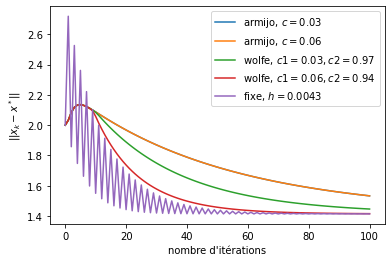

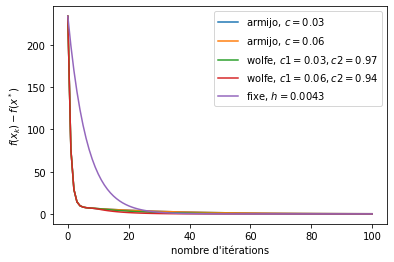

In [ ]:
x0=[-1,1]
L=1000
iteration=100
m=3
M=15
h=1/(m**2+M**2)
quad,quad_grad=mk_quad(m,M)

#armijo
for i in range(1,3):
  c=0.03*i
  X,n=gpo_armijo(quad,quad_grad,x0,c,L,iter=iteration)
  Y=X-np.array([1,1]) #la distance entre les itérés et le minimiseur de f
  dist=[]
  for v in Y:
    dist.append(np.linalg.norm(v,2))
  dist=np.array(dist)
  y=quad(np.array([0,0]))

  Z=np.array([quad(x)-y for x in X]) #la suite f(x_k)-f(x^*)
  plt.figure(1)
  plt.plot(dist,label="armijo, $c={}$".format(c))
  plt.figure(2)
  plt.plot(Z,label="armijo, $c={}$".format(c))

#wolfe
a=1.1
for i in range(1,3):
  c1=0.03*i
  c2=1-c1
  X,n=gpo_wolfe(quad,quad_grad,x0,c1,c2,L,a,iter=iteration)
  Y=X-np.array([1,1])
  dist=[]
  for v in Y:
    dist.append(np.linalg.norm(v,2))
  dist=np.array(dist)
  y=quad(np.array([0,0]))

  Z=np.array([quad(x)-y for x in X])
  plt.figure(1)
  plt.plot(dist,label="wolfe, $c1={},c2={}$".format(c1,c2))
  plt.figure(2)
  plt.plot(Z,label="wolfe, $c1={},c2={}$".format(c1,c2))

#fixe
X,n=gpo_fixe(quad,quad_grad,x0,h,iter=iteration)
Y=X-np.array([1,1])
dist=[]
for v in Y:
  dist.append(np.linalg.norm(v,2))
dist=np.array(dist)
y=quad(np.array([0,0]))

Z=np.array([quad(x)-y for x in X])
plt.figure(1)
plt.plot(dist,label="fixe, $h={:.4f}$".format(h))
plt.figure(2)
plt.plot(Z,label="fixe, $h={:.4f}$".format(h))



plt.figure(1)
plt.xlabel("nombre d'itérations")
plt.ylabel("$||x_k-x^*||$")
plt.legend(loc="best")
plt.figure(2)
plt.xlabel("nombre d'itérations")
plt.ylabel("$f(x_k)-f(x^*)$")
plt.legend(loc="best")

Explications: Ici nous insistons aussi de tester avec $L=1000$ car c'est dans ce cas que l'algo de Wolfe fonctionne différemment de celui d'Armijo lorsque $c_1=c$. Autrement dit, c'est quand $L=1000$ qu'il entre dans la boucle "if $h_d=0$ then $h=ah$"

**Remarque**: il existe encore d'autres règles de _recherche linéaire inexacte_ pour le choix d'un pas de descente comme la règle de Goldstein. Ces règles permettent d'éviter le problème de _recherche linéaire exacte_ tout en accélérant les méthodes de gradient.

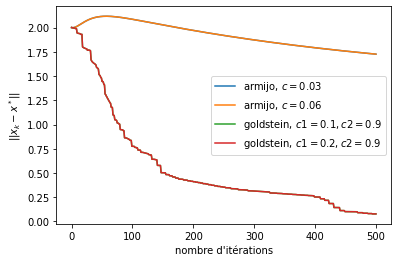

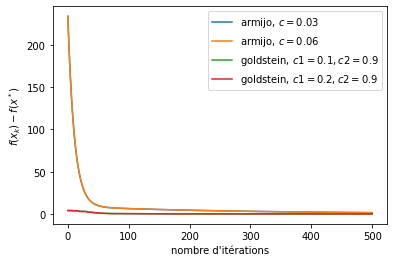

In [ ]:

def gpo_goldstein(f,gradf,x0,c1,c2,L,a,eps=0.01,iter=np.inf):
  x=x0
  grad=gradf(x)
  n=0
  X=np.array([x])
  hd=0
  hg=0
  while max(abs(a) for a in grad)>eps and n<iter:
    h=1/L
    d=-grad
    while f(x+h*d)>f(x)-c1*h*np.dot(d,d) or f(x+h*d)<f(x)-c2*h*np.dot(d,d):
      if f(x+h*d)>f(x)-c1*h*np.dot(d,d):
        hd=h
      else:
        hg=h
      if hd==0:
        h=a*h
      else:
        h=(hg+hd)/2
    x=x-h*grad
    grad=gradf(x)
    n+=1
    X=np.concatenate((X,np.array([x])))
  return X,n


x0=[-1,1]
L=10000
iteration=500

#armijo
m=3
M=15
h=1/(m**2+M**2)
quad,quad_grad=mk_quad(m,M)
for i in range(1,3):
  c=0.03*i
  X,n=gpo_armijo(quad,quad_grad,x0,c,L,iter=iteration)
  Y=X-np.array([1,1]) #la distance entre les itérés et le minimiseur de f
  dist=[]
  for v in Y:
    dist.append(np.linalg.norm(v,2))
  dist=np.array(dist)
  y=quad(np.array([0,0]))

  Z=np.array([quad(x)-y for x in X]) #la suite f(x_k)-f(x^*)
  plt.figure(1)
  plt.plot(dist,label="armijo, $c={}$".format(c))
  plt.figure(2)
  plt.plot(Z,label="armijo, $c={}$".format(c))

#goldstein
a=1.5
for i in range(1,3):
  c1=0.1*i
  c2=1-0.1
  X,n=gpo_goldstein(rosenbrock,rosenbrock_grad,x0,c1,c2,L,a,iter=iteration)
  Y=X-np.array([1,1])
  dist=[]
  for v in Y:
    dist.append(np.linalg.norm(v,2))
  dist=np.array(dist)
  y=rosenbrock(np.array([1,1]))

  Z=np.array([rosenbrock(x)-y for x in X])
  plt.figure(1)
  plt.plot(dist,label="goldstein, $c1={},c2={}$".format(c1,c2))
  plt.figure(2)
  plt.plot(Z,label="goldstein, $c1={},c2={}$".format(c1,c2))

plt.figure(1)
plt.xlabel("nombre d'itérations")
plt.ylabel("$||x_k-x^*||$")
plt.legend(loc="best")
plt.figure(2)
plt.xlabel("nombre d'itérations")
plt.ylabel("$f(x_k)-f(x^*)$")
plt.legend(loc="best")

# Exercise 3. Gradient conjugué (5pt)

Le gradient conjugué est une méthode de type quasi-Newton qui a la propriété de converger en temps fini pour des fonctionnelles quadratiques. On présente ici une extension de cet algorithme.

**Gradient conjugué**. 
On se donne une fonction $f : \mathbb{R}^n \to \mathbb{R}$ à minimiser et un point initial $x_0 \in \mathbb{R}^n$. On initialise $d_0 = 0$.

Partant d'un point courant $x_k$ et d'une direction $d_k$ (ayant servi à  calculer $x_k$ sauf pour $k=0$) à
l'itération $k \in \mathbb{Ν}$, on itère de la manière suivante :

1. *Mise à jour de la direction de descente.*  On met à jour la direction de descente par
  \begin{equation*}
    d_{k+1} = -\nabla f(x_k) + \beta_{k+1} d_k,
  \end{equation*}
  où
  \begin{equation*}
   \beta_{k+1} = \frac{\langle \nabla f(x_{k}) - \nabla f(x_{k-1}), \nabla f(x_{k}) \rangle}{\| \nabla f(x_{k-1}) \|^2}.
  \end{equation*}
2. *Recherche du pas.* On applique une règle de *recherche linéaire inexacte* (ici la règle de Armijo / Wolfe) pour trouver le meilleur pas de descente $h_{k+1}$ pour la direction de descente $d_{k+1}$.
3. *Mise à jour des itérés.* On pose  $x_{k+1} = x_{k} + h_{k+1} d_{k+1}$.

**Remarque 2.** On a ici présenté l'algorithme de *Polak-Ribière* mais il existe d'autres variantes comme le *Fletcher-Reeves*. 


**Banane de Rosenbrock et problème quadratique.** On considère de nouveau les fonctions du premier exercice.

* Implémenter la méthode du gradient conjugué version *Polak-Ribière*.

In [ ]:
def wolfe(f,gradf,c1,c2,a,h0,x,d): # d est d_k
  h=h0
  grad=gradf(x)
  hd=0
  hg=0
  while f(x+h*d)>f(x)+c1*h*np.dot(grad,d) or np.dot(d,gradf(x+h*d))<c2*np.dot(d,grad):
    if f(x+h*d)>f(x)+c1*h*np.dot(grad,d):
      hd=h
    else:
      hg=h
    if hd==0:
      h=a*h
    else:
      h=(hg+hd)/2
  return h

def PoRi(f, gradf, x0, delta, max, dim, c1,c2,a,h0):
  x0=np.asarray(x0)
  d=np.zeros(dim)
  grad0=np.zeros(dim) #gradf(x_{k-1})
  grad1=gradf(x0)   #gradf(x_{k})
  norm_grad= np.linalg.norm(grad1, 2)
  d=-grad1      # car d_0=0
  h=wolfe(f,gradf,c1,c2,a,h0,x0,d)
  x1=x0+h*d   #x_k
  X=np.array([x0,x1])
  k=0
  while norm_grad > delta and k < max:
    grad0=gradf(x0)
    grad1=gradf(x1)
    beta=np.dot(grad1-grad0, grad1)/np.dot(grad0,grad0)
    d=-grad1+beta*d
    h=wolfe(f,gradf,c1,c2,a,h0,x1,d)
    [x1,x0] = [x1+h*d, x1]
    k+=1
    X=np.concatenate((X,np.array([x1])))
    norm_grad= np.linalg.norm(grad1,2)
  return X



* Tester l'algorithme pour la fonction de Rosenbrock avec $x_0 = (-1,1)$. Comparer l'algorithme avec les méthodes précédentes.

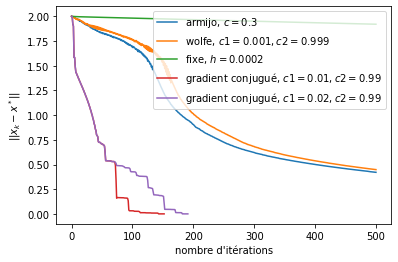

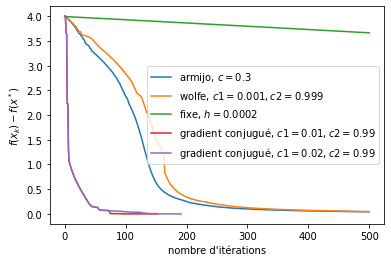

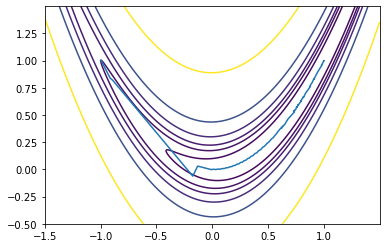

In [ ]:
x0=[-1,1]
L=100
iteration=500

#armijo

c=0.3
X,n=gpo_armijo(rosenbrock,rosenbrock_grad,x0,c,L,iter=iteration)
Y=X-np.array([1,1]) #la distance entre les itérés et le minimiseur de f
dist=[]
for v in Y:
  dist.append(np.linalg.norm(v,2))
dist=np.array(dist)
y=rosenbrock(np.array([1,1]))

Z=np.array([rosenbrock(x)-y for x in X]) #la suite f(x_k)-f(x^*)
plt.figure(1)
plt.plot(dist,label="armijo, $c={}$".format(c))
plt.figure(2)
plt.plot(Z,label="armijo, $c={}$".format(c))

#wolfe
a=2

c1=0.001
c2=1-0.001
X,n=gpo_wolfe(rosenbrock,rosenbrock_grad,x0,c1,c2,L,a,iter=iteration)
Y=X-np.array([1,1])
dist=[]
for v in Y:
  dist.append(np.linalg.norm(v,2))
dist=np.array(dist)
y=rosenbrock(np.array([1,1]))

Z=np.array([rosenbrock(x)-y for x in X])
plt.figure(1)
plt.plot(dist,label="wolfe, $c1={},c2={}$".format(c1,c2))
plt.figure(2)
plt.plot(Z,label="wolfe, $c1={},c2={}$".format(c1,c2))

#gradient à pas fixe
h=0.0001*i
X,n=gpo_fixe(rosenbrock,rosenbrock_grad,x0,h,iter=iteration)
Y=X-np.array([1,1])
dist=[]
for v in Y:
  dist.append(np.linalg.norm(v,2))
dist=np.array(dist)
y=rosenbrock(np.array([1,1]))

Z=np.array([rosenbrock(x)-y for x in X])
plt.figure(1)
plt.plot(dist,label="fixe, $h={}$".format(h))
plt.figure(2)
plt.plot(Z,label="fixe, $h={}$".format(h))

#gradient conjugué
delta=0.001
for i in range(1,3):
  c1=0.01*i
  c2=1-0.01
  X=PoRi(rosenbrock,rosenbrock_grad,x0,delta,iteration,2,c1,c2,a,1/L)
  Y=X-np.array([1,1])
  dist=[]
  for v in Y:
    dist.append(np.linalg.norm(v,2))
  dist=np.array(dist)
  y=rosenbrock(np.array([1,1]))

  Z=np.array([rosenbrock(x)-y for x in X])
  plt.figure(1)
  plt.plot(dist,label="gradient conjugué, $c1={},c2={}$".format(c1,c2))
  plt.figure(2)
  plt.plot(Z,label="gradient conjugué, $c1={},c2={}$".format(c1,c2))

plt.figure(3)
x = np.arange(-1.5, 1.5, delta)
y = np.arange(-0.5, 1.5, delta)
Xo, Yo = np.meshgrid(x, y)
Zo = rosenbrock([Xo,Yo])
plt.contour(Xo,Yo,Zo,levels=[0,2,4,6,10,20,80])
plt.plot(X[:,0],X[:,1])

plt.figure(1)
plt.xlabel("nombre d'itérations")
plt.ylabel("$||x_k-x^*||$")
plt.legend(loc="best")
plt.figure(2)
plt.xlabel("nombre d'itérations")
plt.ylabel("$f(x_k)-f(x^*)$")
plt.legend(loc="best")
# print(Y)
# print(Z)

* Pour un problème quadratique, le gradient conjugué converge en au plus $n$ itérations où $n$ est la taille du problème. Vérifier cette affirmation pour différentes tailles de matrices dans le cadre du problème quadratique introduit précédemment.

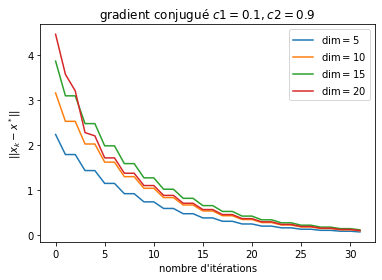

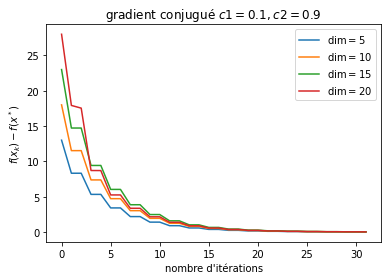

In [ ]:
m=1
M=3
delta=0.00001
iteration=30

quad,quad_grad=mk_quad(m,M)
plt.figure()
plt.clf()
for dim in range(1,5):
  dim=dim*5
  Y=[]
  x0=np.ones(dim)
  quad,quad_grad=mk_quad(m,M,dim)
  c1=0.1
  c2=1-0.1
  X=PoRi(quad,quad_grad,x0,delta,iteration,dim,c1,c2,a,1/(m**2+M**2))
  Y=X-np.zeros(dim)
  dist=[]
  for v in Y:
    dist.append(np.linalg.norm(v,2))
  dist=np.array(dist)
  y=quad(np.zeros(dim))

  Z=np.array([quad(x)-y for x in X])
  plt.figure(1)
  plt.plot(dist,label="dim$={}$".format(dim))
  plt.figure(2)
  plt.plot(Z,label="dim$={}$".format(dim))

plt.figure(1)
plt.title("gradient conjugué $c1={},c2={}$".format(c1,c2))
plt.xlabel("nombre d'itérations")
plt.ylabel("$||x_k-x^*||$")
plt.legend(loc="best")
plt.figure(2)
plt.title("gradient conjugué $c1={},c2={}$".format(c1,c2))
plt.xlabel("nombre d'itérations")
plt.ylabel("$f(x_k)-f(x^*)$")
plt.legend(loc="best")